<center><h3>Development of Machine Learning Model for Diagnostic Disease Prediction based on Laboratory Test</h3></center>

### Importing Modules

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [115]:
df = pd.read_csv('dataset.csv')
df.head()

Gender  Age  Hemoglobin   RBC    WBC  AST (aspartate aminotransferase)  \
0    Male   59           6  1.20   6220                                26   
1    Male   71           6  1.01   6636                                18   
2  Female   22          14  3.55  18314                                21   
3    Male   53          16  4.95   9931                                45   
4    Male   77          16  3.96   7088                                29   

   ALT (alanine aminotransferase)  Cholestrol  Spirometry  Creatinine  \
0                              22         227        4.75        0.90   
1                              27         220        3.93        1.03   
2                              30         224        3.93        1.17   
3                              62         205        3.58        0.81   
4                              25         217        3.20        1.70   

   Glucose  Lipase  Troponin        Disease   
0       96      97      0.02          Anemia  
1       94      82      0.04          Anemia  
2       70     101      0.00       Infection  
3       82     108      0.03   Liver Disease  
4       97     107      0.04  Kidney Disease

In [116]:
df.tail()

Gender  Age  Hemoglobin   RBC   WBC  AST (aspartate aminotransferase)  \
12004  Female   51          16  5.07  8724                                16   
12005    Male   33          14  4.44  6893                                19   
12006  Female   33          16  4.99  6863                                15   
12007    Male   75           3  1.01  9514                                24   
12008  Female   35           3  0.62  8001                                28   

       ALT (alanine aminotransferase)  Cholestrol  Spirometry  Creatinine  \
12004                              32         212        4.57        0.87   
12005                              31         229        4.22        1.71   
12006                              32         208        3.68        1.11   
12007                              32         207        3.39        0.90   
12008                              24         206        4.80        1.13   

       Glucose  Lipase  Troponin        Disease   
12004       85      94      0.06    Heart attack  
12005       76     107      0.00  Kidney Disease  
12006      138      78      0.02       Diabetics  
12007       71      73      0.00          Anemia  
12008       94     118      0.01          Anemia

### Understanding the Data

In [117]:
df.shape

(12009, 14)

In [118]:
df.columns

Index(['Gender', 'Age', 'Hemoglobin', 'RBC', 'WBC',
       'AST (aspartate aminotransferase)', 'ALT (alanine aminotransferase)',
       'Cholestrol', 'Spirometry', 'Creatinine', 'Glucose', 'Lipase',
       'Troponin', 'Disease '],
      dtype='object')

In [119]:
df.isna().sum()

Gender                              0
Age                                 0
Hemoglobin                          0
RBC                                 0
WBC                                 0
AST (aspartate aminotransferase)    0
ALT (alanine aminotransferase)      0
Cholestrol                          0
Spirometry                          0
Creatinine                          0
Glucose                             0
Lipase                              0
Troponin                            0
Disease                             0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df.dtypes

Gender                               object
Age                                   int64
Hemoglobin                            int64
RBC                                 float64
WBC                                   int64
AST (aspartate aminotransferase)      int64
ALT (alanine aminotransferase)        int64
Cholestrol                            int64
Spirometry                          float64
Creatinine                          float64
Glucose                               int64
Lipase                                int64
Troponin                            float64
Disease                              object
dtype: object

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            12009 non-null  object 
 1   Age                               12009 non-null  int64  
 2   Hemoglobin                        12009 non-null  int64  
 3   RBC                               12009 non-null  float64
 4   WBC                               12009 non-null  int64  
 5   AST (aspartate aminotransferase)  12009 non-null  int64  
 6   ALT (alanine aminotransferase)    12009 non-null  int64  
 7   Cholestrol                        12009 non-null  int64  
 8   Spirometry                        12009 non-null  float64
 9   Creatinine                        12009 non-null  float64
 10  Glucose                           12009 non-null  int64  
 11  Lipase                            12009 non-null  int64  
 12  Trop

In [123]:
df.describe()

Age    Hemoglobin           RBC           WBC  \
count  12009.000000  12009.000000  12009.000000  12009.000000   
mean      54.415438     11.892497      3.353866   9154.022317   
std       21.160408      4.552787      1.622399   3922.574987   
min       18.000000      2.000000      0.110000   6005.000000   
25%       36.000000      6.000000      1.100000   7061.000000   
50%       55.000000     14.000000      4.000000   8187.000000   
75%       73.000000     15.000000      4.530000   9207.000000   
max       90.000000     16.000000      5.110000  27901.000000   

       AST (aspartate aminotransferase)  ALT (alanine aminotransferase)  \
count                      12009.000000                    12009.000000   
mean                          24.613457                       31.168873   
std                            8.150145                       11.565622   
min                           15.000000                       20.000000   
25%                           19.000000                       24.000000   
50%                           23.000000                       28.000000   
75%                           28.000000                       33.000000   
max                           50.000000                       70.000000   

         Cholestrol    Spirometry    Creatinine       Glucose        Lipase  \
count  12009.000000  12009.000000  12009.000000  12009.000000  12009.000000   
mean     217.975685      3.798141      1.099124     90.801815    101.816554   
std       13.956727      0.887210      0.295349     18.361879     27.901340   
min      200.000000      1.010000      0.800000     70.000000     70.000000   
25%      208.000000      3.390000      0.910000     78.000000     83.000000   
50%      216.000000      3.940000      1.030000     87.000000     97.000000   
75%      224.000000      4.440000      1.140000     96.000000    110.000000   
max      281.000000      5.010000      2.000000    157.000000    202.000000   

           Troponin  
count  12009.000000  
mean       0.027720  
std        0.023478  
min        0.000000  
25%        0.010000  
50%        0.020000  
75%        0.030000  
max        0.100000

In [124]:
df.describe(include='object')

Gender Disease 
count    12009    12009
unique       2        9
top     Female   Anemia
freq      6209     3069

### Exploratory Data Analysis

#### Univariate Analysis

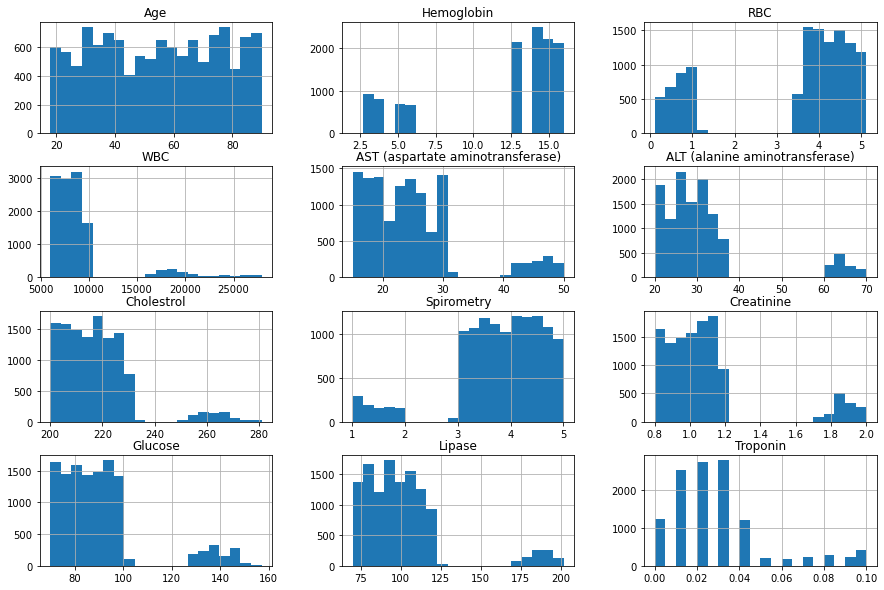

In [125]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

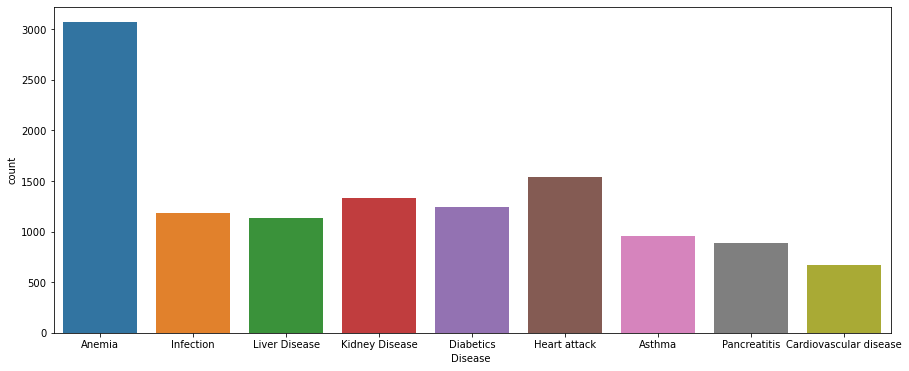

In [111]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Disease ', data=df)
plt.show()

#### Multivariate Analysis

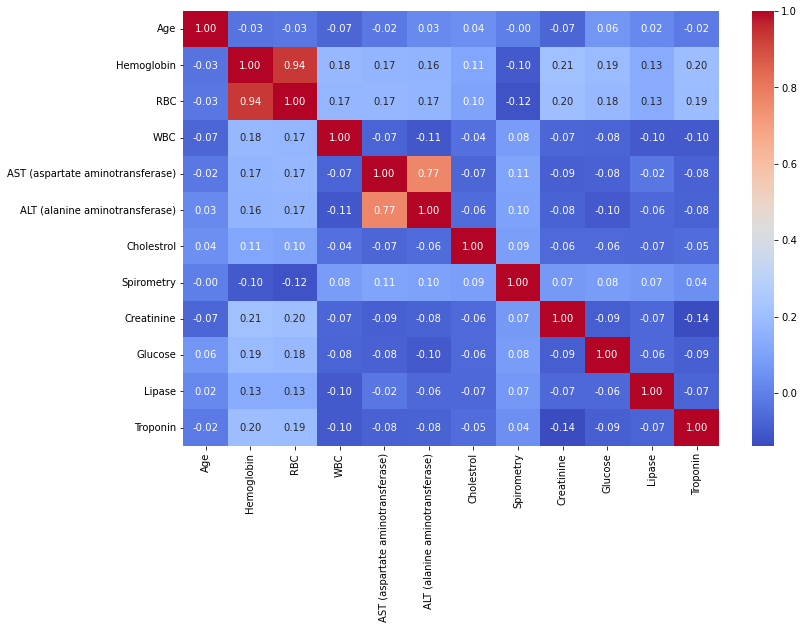

In [112]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

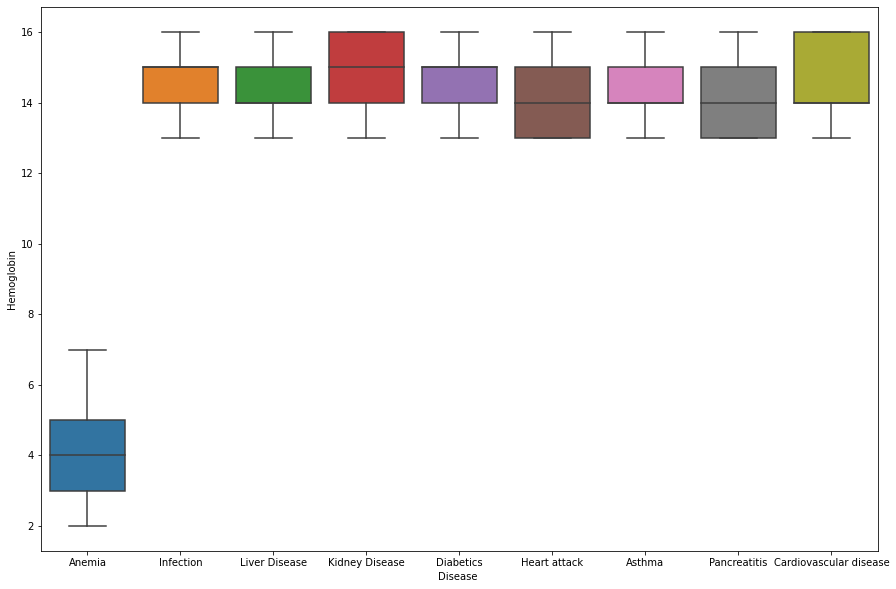

In [113]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Hemoglobin', data=df)
plt.show()

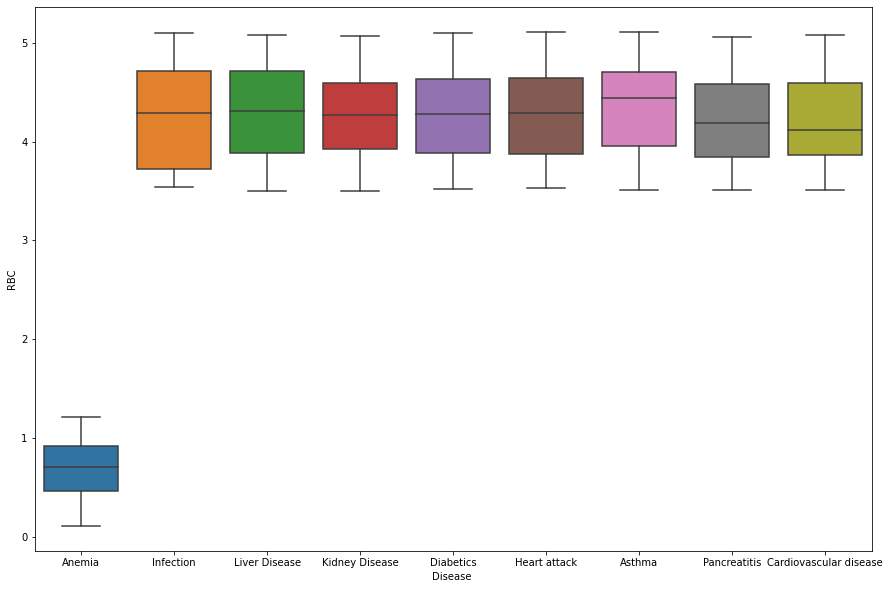

In [61]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='RBC', data=df)
plt.show()

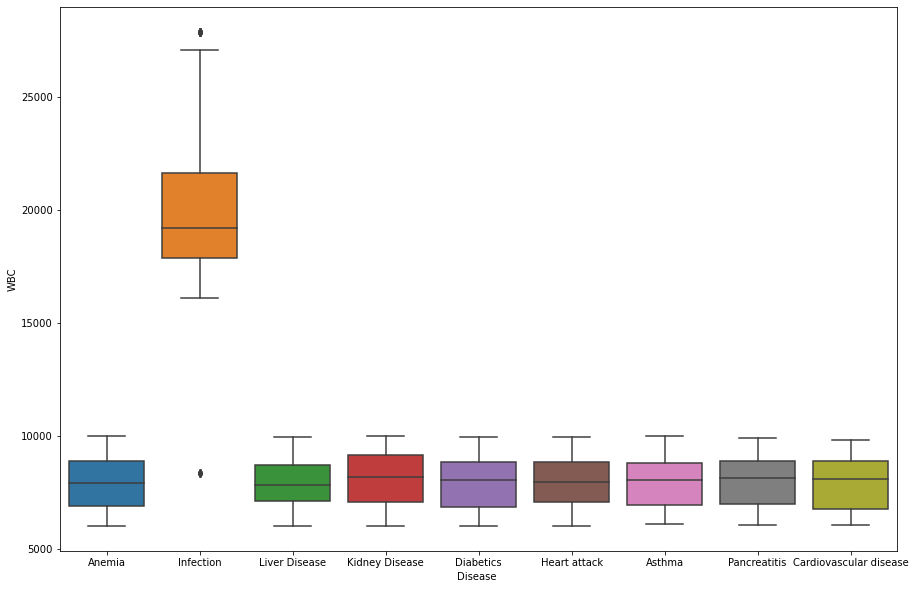

In [62]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='WBC', data=df)
plt.show()

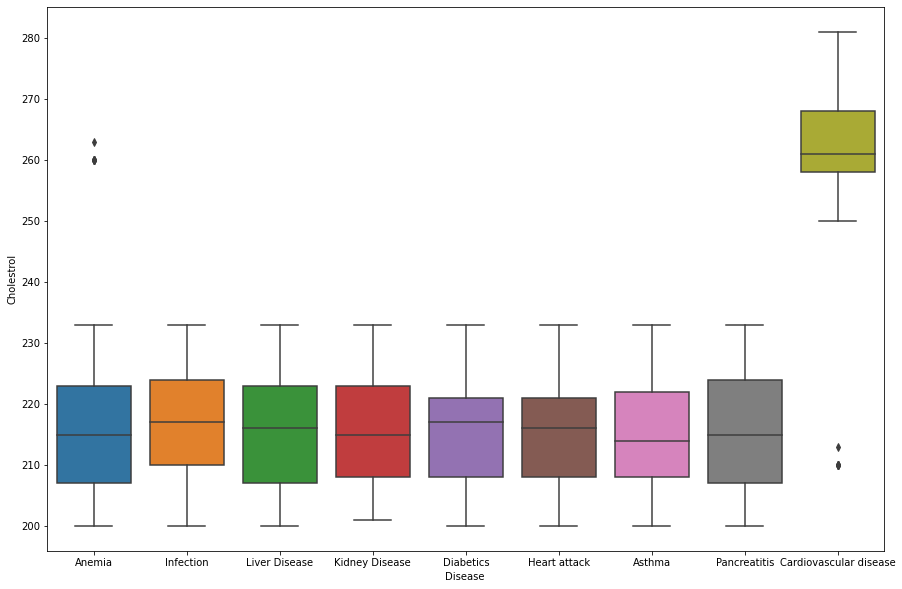

In [63]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Cholestrol', data=df)
plt.show()

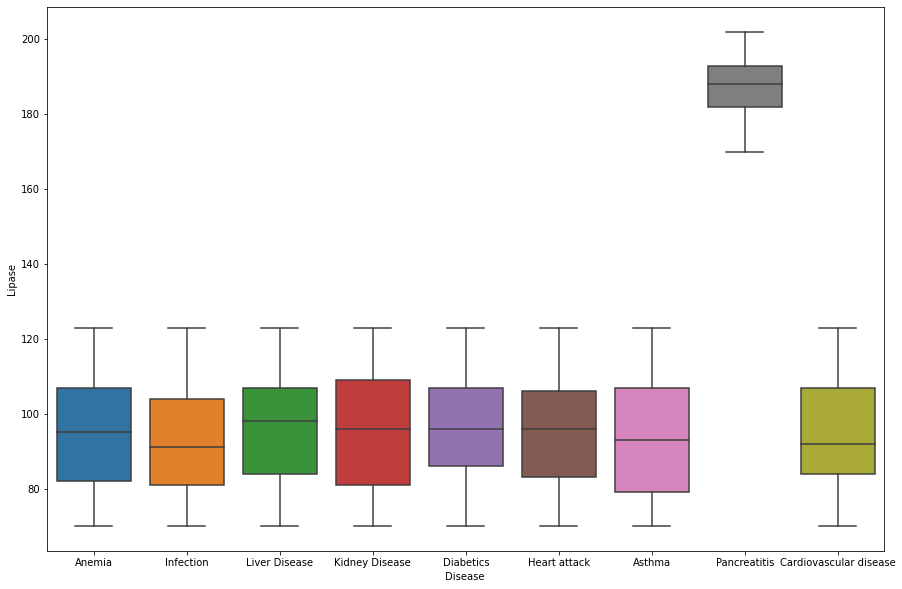

In [64]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Disease ', y='Lipase', data=df)
plt.show()

### Label Encoding

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [66]:
df['Gender'] = le.fit_transform(df['Gender'])

In [67]:
df['Disease '] = le.fit_transform(df['Disease '])

In [68]:
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Category Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Mapping:
Anemia: 0
Asthma: 1
Cardiovascular disease: 2
Diabetics: 3
Heart attack: 4
Infection: 5
Kidney Disease: 6
Liver Disease: 7
Pancreatitis: 8


### Defining Independent and Dependent Variables

In [69]:
x = df.values[:,:13]

In [70]:
y = df.values[:,13]

### Splitting the Data for Training and Testing

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [72]:
print("Total length of the dataset: ",len(df))
print("Total length of training data: ",len(X_train))
print("Total length of testing data: ",len(X_test))

Total length of the dataset:  12009
Total length of training data:  9607
Total length of testing data:  2402


### Machine Learning Model Selection

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

pred= rf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

#print("Accuracy for Random Forest: ", accuracy_score(y_test, pred)*100)

In [75]:

confusion_matrix(y_test, pred)

array([[634,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 216,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 241,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 301,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 226,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 257,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174]], dtype=int64)

In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

In [77]:
print("Accuracy for XGB Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for XGB Classifier:  99.95836802664446


In [78]:
confusion_matrix(y_test, pred)

array([[634,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 216,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 122,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0, 241,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 301,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 226,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 257,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174]], dtype=int64)

In [79]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 42)

lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.372545
[LightGBM] [Info] Start training from score -2.558206
[LightGBM] [Info] Start training from score -2.865798
[LightGBM] [Info] Start training from score -2.263492
[LightGBM] [Info] Start training from score -2.048187
[LightGBM] [Info] Start training from score -2.309584
[LightGBM] [Info] Start training from score -2.192034
[LightGBM] [Info] Start training from score -2.367853
[LightGBM] [Info] Start training from score -2.596567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [80]:
print("Accuracy for LGBM Classifier: ", accuracy_score(y_test, pred)*100)

Accuracy for LGBM Classifier:  99.95836802664446


In [81]:
confusion_matrix(y_test, pred)

array([[634,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 216,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 122,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0, 241,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 301,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 226,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 257,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174]], dtype=int64)

In [85]:
from sklearn.ensemble import VotingClassifier

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
voting_classifier = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model),
        ('lightgbm', lgbm_model)
    ],
    voting='soft'
)

In [86]:
voting_classifier.fit(X_train, y_train)

predictions = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)*100
print(f"Ensemble Model Accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 9607, number of used features: 13
[LightGBM] [Info] Start training from score -1.372545
[LightGBM] [Info] Start training from score -2.558206
[LightGBM] [Info] Start training from score -2.865798
[LightGBM] [Info] Start training from score -2.263492
[LightGBM] [Info] Start training from score -2.048187
[LightGBM] [Info] Start training from score -2.309584
[LightGBM] [Info] Start training from score -2.192034
[LightGBM] [Info] Start training from score -2.367853
[LightGBM] [Info] Start training from score -2.596567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Ensemble Model Accuracy: 100.0


In [87]:
confusion_matrix(y_test, predictions)

array([[634,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 216,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 241,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 301,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 226,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 257,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174]], dtype=int64)

In [88]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(voting_classifier, files)

In [89]:
import sklearn

print(sklearn.__version__)

1.0.2


In [90]:
output_file = 'model.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(rf, file)

In [91]:
inp = np.array([0, 59, 6, 1.20, 6220, 26, 22, 227, 4.75, 0.90, 96, 97, 0.02])
inp1 = inp.reshape(1,-1)
pred = voting_classifier.predict(inp1)
print(pred)

[0.]


In [92]:
df=pd.read_csv("dataset.csv")

label_mappings = {}

# Apply LabelEncoder to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoder = LabelEncoder()
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
        label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



label_mappings

{'Gender': {'Female': 0, 'Male': 1},
 'Disease ': {'Anemia': 0,
  'Asthma': 1,
  'Cardiovascular disease': 2,
  'Diabetics': 3,
  'Heart attack': 4,
  'Infection': 5,
  'Kidney Disease': 6,
  'Liver Disease': 7,
  'Pancreatitis': 8}}

In [93]:
vc_acc =  accuracy_score(predictions, y_test)*100

In [94]:
vc_prec = precision_score(predictions, y_test, average='macro') *100

In [95]:
vc_recall = recall_score(predictions, y_test, average='macro')*100

In [96]:
vc_f1 = f1_score(predictions, y_test, average='macro')*100

In [97]:
metrics = {
    'Accuracy': vc_acc,
    'Precision': vc_prec,
    'Recall': vc_recall,
    'F1 Score': vc_f1,
}

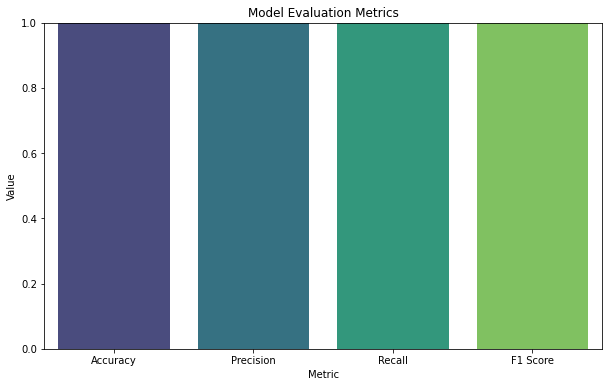

In [98]:
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limit to match the range of metric values (0 to 1 for percentages)
plt.show()